# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [46]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files
import numpy as np

In [255]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

In [4]:
ls

sample_data/  sonar.csv


## Do some magic below! ;)

In [290]:
import pandas as pd

# Cargar los datos desde el archivo CSV
sonar_data = pd.read_csv('sonar.csv')

# Mostrar las primeras filas del DataFrame para entender la estructura de los datos
sonar_data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [291]:
sonar_data_numpy = sonar_data.values

In [292]:
# Separar características (X) y etiquetas (y)
X = sonar_data_numpy[:, :60]
y = sonar_data_numpy[:, 60:61]

In [293]:
np.unique(y)

array(['M', 'R'], dtype=object)

In [294]:
# Normalizar los datos
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [295]:
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()

In [298]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X_norm, y_onehot,
                                                  test_size=0.1)

In [299]:
# Definir modelo de red neuronal
model = Sequential()
model.add(Dense(512, input_dim=60, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [300]:
# Compilar modelo
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [301]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 512)               31232     
                                                                 
 dense_118 (Dense)           (None, 256)               131328    
                                                                 
 dense_119 (Dense)           (None, 128)               32896     
                                                                 
 dense_120 (Dense)           (None, 2)                 258       
                                                                 
Total params: 195714 (764.51 KB)
Trainable params: 195714 (764.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [302]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=42,
                    validation_data=(X_val, y_val))

Epoch 1/20
5/5 [==============================] - 1s 39ms/step - loss: 0.6523 - accuracy: 0.6344 - val_loss: 0.4965 - val_accuracy: 0.7619
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.4573 - accuracy: 0.8280 - val_loss: 0.3689 - val_accuracy: 0.8095
Epoch 3/20
5/5 [==============================] - 0s 8ms/step - loss: 0.3242 - accuracy: 0.9194 - val_loss: 0.2860 - val_accuracy: 0.9524
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.2134 - accuracy: 0.9462 - val_loss: 0.2470 - val_accuracy: 0.8571
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1329 - accuracy: 0.9624 - val_loss: 0.2529 - val_accuracy: 0.8571
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.0758 - accuracy: 0.9892 - val_loss: 0.2565 - val_accuracy: 0.8571
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0392 - accuracy: 0.9946 - val_loss: 0.2656 - val_accuracy: 0.8571
Epoch 8/20
5/5 [=================

In [303]:
# Evaluar el modelo en conjunto de validación
loss, accuracy = model.evaluate(X_val, y_val)
print("Pérdida en el conjunto de validación:", loss)
print("Precisión en el conjunto de validación:", accuracy)

1/1 [==============================] - 0s 18ms/step - loss: 0.5086 - accuracy: 0.8571
Pérdida en el conjunto de validación: 0.50859135389328
Precisión en el conjunto de validación: 0.8571428656578064


In [304]:
# Obtener la precisión y la pérdida del historial de entrenamiento
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

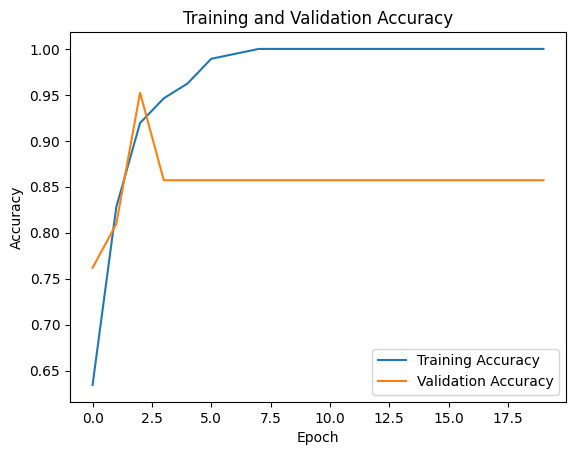

In [305]:
# Graficar la precisión
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

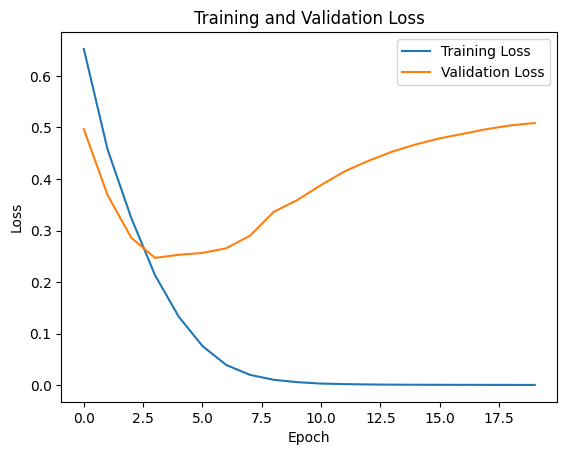

In [306]:
# Graficar la pérdida
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

De esta manera, conseguimos un modelo que consigue predecir el comportamiento del sonar con una precisión de 0.85, superior al objetivo propuesto en este ejercicio de 0.8.